In [2]:
import os
import random
import hickle as hkl
import pickle as pickle
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # Visible devices must be set at program startup
    print(e)

In [3]:
DATADIR = r'./data/Face Mask Dataset'
TRAIN_DATADIR = os.path.join(DATADIR, 'train')
VALID_DATADIR = os.path.join(DATADIR, 'validation')
TEST_DATADIR = os.path.join(DATADIR, 'test')

In [4]:
CATEGORIES = []
for d in os.listdir(TRAIN_DATADIR):
    CATEGORIES.append(d)
print(CATEGORIES)

['WithMask', 'WithoutMask']


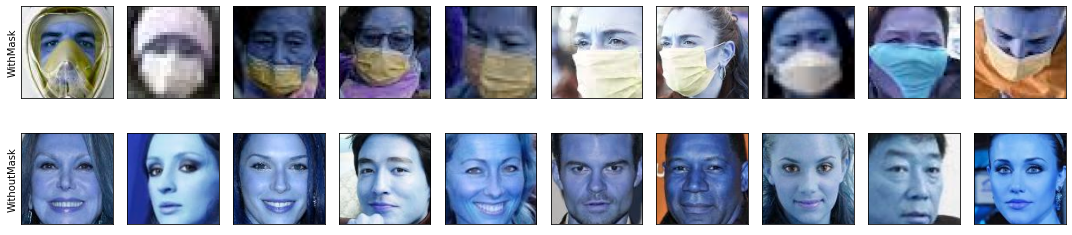

In [5]:
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATADIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show()

In [6]:
IMG_DIM_SIZE = 227

In [7]:
train_data = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DATADIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_DIM_SIZE, IMG_DIM_SIZE)) 
            train_data.append([img_resized, class_num]) 
        except WException as e:
            pass       
print(len(train_data))

100%|██████████| 5000/5000 [00:02<00:00, 2004.81it/s]

10000


In [8]:
validation_data = []
for c in CATEGORIES:
    path = os.path.join(VALID_DATADIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_DIM_SIZE, IMG_DIM_SIZE)) 
            validation_data.append([img_resized, class_num]) 
        except WException as e:
            pass       
print(len(validation_data))

100%|██████████| 400/400 [00:00<00:00, 2020.20it/s]

800


In [9]:
test_data = []
for c in CATEGORIES:
    path = os.path.join(TEST_DATADIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))  
            img_resized = cv2.resize(img_array, (IMG_DIM_SIZE, IMG_DIM_SIZE)) 
            test_data.append([img_resized, class_num]) 
        except WException as e:
            pass       
print(len(test_data))

100%|██████████| 509/509 [00:00<00:00, 2060.74it/s]

992


In [10]:
random.shuffle(train_data)
random.shuffle(test_data)
random.shuffle(validation_data)

In [11]:
X_train = []
Y_train = []

for img, label in train_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,IMG_DIM_SIZE,IMG_DIM_SIZE,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

hkl.dump(X_train, './data/hickle/X_train.hkl', mode='w' , compression='gzip')
hkl.dump(Y_train, './data/hickle/Y_train.hkl', mode='w', )

pickle_out = open("./data/pickle/X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("./data/pickle/Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()



X_train= (10000, 227, 227, 3) Y_train= (10000,)


In [12]:
X_test = []
Y_test = []

for img, label in test_data:
    X_test.append(img)
    Y_test.append(label)
    
X_test = np.array(X_test).astype('float32').reshape(-1,IMG_DIM_SIZE,IMG_DIM_SIZE,3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

hkl.dump(X_test, './data/hickle/X_test.hkl', mode='w')

hkl.dump(Y_test, './data/hickle/Y_test.hkl', mode='w')

pickle_out = open("./data/pickle/X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("./data/pickle/Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()


X_test= (992, 227, 227, 3) Y_test= (992,)


In [13]:
X_validation = []
Y_validation = []

for img, label in validation_data:
    X_validation.append(img)
    Y_validation.append(label)
    
X_validation = np.array(X_validation).astype('float32').reshape(-1,IMG_DIM_SIZE,IMG_DIM_SIZE,3)
Y_validation = np.array(Y_validation)

print(f"X_validation= {X_validation.shape} Y_validation= {Y_validation.shape}")

hkl.dump(X_validation, './data/hickle/X_validation.hkl', mode='w')
hkl.dump(Y_validation, './data/hickle/Y_validation.hkl', mode='w')


pickle_out = open("./data/pickle/X_validation.pickle","wb")
pickle.dump(X_validation, pickle_out)
pickle_out.close()

pickle_out = open("./data/pickle/Y_validation.pickle","wb")
pickle.dump(Y_validation, pickle_out)
pickle_out.close()

X_validation= (800, 227, 227, 3) Y_validation= (800,)
